# Projeto - Análise de Risco de Crédito

A análise de risco de crédito é um componente essencial para instituições financeiras e credores, ajudando a determinar a capacidade de um cliente em cumprir suas obrigações financeiras. Tradicionalmente, essa análise era realizada por meio de métodos estatísticos convencionais e avaliações manuais, que, apesar de eficientes, possuem limitações em termos de precisão, escalabilidade e capacidade de adaptação a novos padrões de comportamento.

In [61]:
# Bibliotecas de análise de dados e visualização
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [62]:
# Bibliotecas de pré-processamento de dados
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

### Carregando os dados

In [63]:
data_path = r"C:\Users\gabri\OneDrive\Documentos\Projetos Data Science\DSNP 3.0\Datasets\acquisition_train.csv"

cred_risk_df = pd.read_csv(data_path)

cred_risk_df.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,...,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,...,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,...,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,...,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,...,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,...,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


In [64]:
print('Dimensões do conjunto\n',
      f'\nEntradas: {cred_risk_df.shape[0]}',
      f'\nVariáveis: {cred_risk_df.shape[1]}')

print('\nNomes das colunas:')
cred_risk_df.columns

Dimensões do conjunto
 
Entradas: 45000 
Variáveis: 43

Nomes das colunas:


Index(['ids', 'target_default', 'score_1', 'score_2', 'score_3', 'score_4',
       'score_5', 'score_6', 'risk_rate', 'last_amount_borrowed',
       'last_borrowed_in_months', 'credit_limit', 'reason', 'income',
       'facebook_profile', 'state', 'zip', 'channel', 'job_name', 'real_state',
       'ok_since', 'n_bankruptcies', 'n_defaulted_loans', 'n_accounts',
       'n_issues', 'application_time_applied', 'application_time_in_funnel',
       'email', 'external_data_provider_credit_checks_last_2_year',
       'external_data_provider_credit_checks_last_month',
       'external_data_provider_credit_checks_last_year',
       'external_data_provider_email_seen_before',
       'external_data_provider_first_name',
       'external_data_provider_fraud_score', 'lat_lon', 'marketing_channel',
       'profile_phone_number', 'reported_income', 'shipping_state',
       'shipping_zip_code', 'profile_tags', 'user_agent', 'target_fraud'],
      dtype='object')

### Dicionário de Variáveis

Observando os nomes de colunas e as primeiras entradas, podemos inferir algumas coisas. Além disso, se analisarmos cada variável em seus valores únicos, podemos deduzir o signficado, além de já identificar problemas nos dados:

- `ids`: Identificadores dos clientes, aparentemente são _strings_ aleatórias que não serão úteis para a análise;
- `score_1, score_2`: Variáveis de pontuação codificadas;
- `score_3, score_4, score_5, score_6`: Variáveis numéricas que dizem respeito a pontuação do cliente. Pode ser útil para identificar inadimplentes;
- `risk_rate`: Taxa de risco (de inadimplência?) do cliente (valores entre 0 e 1);
- `last_amount_borrowed`: Registro do valor do último empréstimo do cliente;
- `last_borrowed_in_months`: Número de meses desde o último empréstimo (36., nan, 60.);
- `credit_limit`: Limite de crédito para determinado cliente;
- `income`: Renda anual do cliente;
- `state, zip, channel, job_name, real_state`: Dados demográficos e informações sobre trabalho dos clientes (codificadas);
- `n_bankruptcies`: Número de falências registradas do cliente ( 0.,  1., nan,  2.,  3.,  4.,  5.);
- `n_defaulted_loans`: Número de calotes nos empréstimos (0., 1., nan, 2., 3., 5.);
- `n_accounts`: Número de contas (valor inteiro);
- `n_issues`: Número de problemas (valor inteiro);
- `application_time_applied`: Tempo de aplicação (Em horas. Não está claro a que se refere);
- `email`: Provedor de e-mail (outlook, gmail, etc);
- `external_data_provider_credit_checks_last_2_year`: Coluna com 0 ou nan. Checagem de crédito nos últimos dois anos;
- `external_data_provider_credit_checks_last_year`, `external_data_provider_credit_checks_last_month`: Checagem de crédito no último ano (0., nan, 1.) e último mês (2, 1, 3, 0);
- `external_data_provider_email_seen_before`: E-mail visto antes (possui valores nan e discrepantes, como -999)
- `external_data_provider_first_name`: Primeiro nome do cliente;
- `external_data_provider_fraud_score`: Pontuação de fraude (não faz parte do escopo da nossa análise);
- `lat_lon`: Tupla de valores de latitude e longitude;
- `marketing_channel`: Canal de marketing (convite e-mail, radio, lista de espera, website, etc);
- `profile_phone_number`: Número de telefone do cliente;
- `reported_income`: Renda informada pelo cliente (float, mas poderia ser int);
- `shipping_state`, `shipping_zip_code`: Estado de residência do cliente (BR-MG, BR-SP, etc) e CEP (int);
- `profile_tags`: Lista com dicionários contendo o que parece ser tags de identificação dos clientes ("{'tags': ['n19', 'n8']}", "{'tags': ['n6', 'n7', 'nim']}"). PS: Dicionários formatados como string.
- `user_agent`: Informações sobre pontos de acesso;
- `target_fraud`: Variável que classifica uma transação fraudulenta ou não (fora do escopo do projeto);
- `target_default (Alvo)`: Variável que classifica um cliente inadimplente ou não (False, True, nan).

### Análise da variável-alvo

Como visto, a variável `target_default` é o nosso alvo, contendo informações dos clientes regulares e inadimplentes. Vamos verificar algumas informações sobre ela, como valores únicos e proporções das classes.

In [146]:
print('Valores na variável-alvo:', cred_risk_df['target_default'].unique())

Valores na variável-alvo: [False True nan]


Antes de iniciar qualquer análise, vimos que o alvo possui valores ausentes, de modo que será necessário remover essas entradas (caso a proporção no conjunto não seja muito grande) para podermos ter o dado real da distribuição de classes no conjunto.

In [147]:
target_null = cred_risk_df['target_default'].isna().sum()

print(f'Quantidade de valores nulos no alvo: {target_null}')
print(f'Proporção de nulos no alvo: {(target_null * 100/ cred_risk_df.__len__()).round(2)} %')

Quantidade de valores nulos no alvo: 3259
Proporção de nulos no alvo: 7.24 %


De fato, temos 7,24% de dados nulos no alvo. Apesar de não ser uma quantidade desprezível, não é uma proporção tão grande a ponto de afetar nossa análise. Assim, essas entradas serão removidas.

In [148]:
def remove_target_nan(df: pd.DataFrame):
    cred_risk_df_clean = df.copy()

    nan_idx = cred_risk_df_clean.loc[cred_risk_df_clean['target_default'].isna()].index

    cred_risk_df_clean.drop(index = nan_idx, axis = 0, inplace = True)
    print('Valores nulos removidos!')

    return cred_risk_df_clean

In [149]:
cred_risk_df_clean = remove_target_nan(cred_risk_df)

Valores nulos removidos!


Agora, podemos olhar para a distribuição das classes no conjunto, através da análise de proporção.

In [150]:
print('Distribuição das classes:\n')

class_count = cred_risk_df_clean['target_default'].value_counts()

print(class_count)

print('\nProporção no conjunto: \n')

class_0 = (class_count.iloc[0] * 100/ cred_risk_df_clean.__len__()).round(2)
class_1 = (class_count.iloc[1] * 100/ cred_risk_df_clean.__len__()).round(2)

print(f'False: \t{class_0} %',
      f'\nTrue: \t{class_1} %')

Distribuição das classes:

target_default
False    35080
True      6661
Name: count, dtype: int64

Proporção no conjunto: 

False: 	84.04 % 
True: 	15.96 %


Temos portanto um problema bastante desbalanceado, com 35 mil entradas (84,04%) que correspondem a clientes normais, e 6661 entradas (15,96%) que representam clientes inadimplentes.

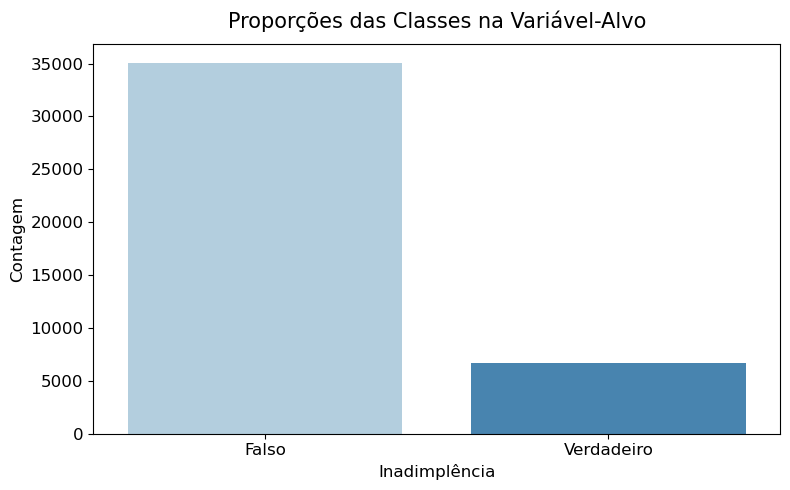

In [151]:
fig, ax = plt.subplots(figsize = (8, 5))

sns.countplot(data = cred_risk_df_clean, x = 'target_default', palette = 'Blues', ax = ax)

ax.set_title('Proporções das Classes na Variável-Alvo', fontsize = 15, pad = 12)
ax.set_ylabel('Contagem', fontsize = 12)
ax.set_xlabel('Inadimplência', fontsize = 12)
ax.set_xticklabels(['Falso', 'Verdadeiro'], fontdict = {'fontsize': 12})
ax.set_yticks(ticks = np.arange(0, 4e4, 5e3), 
              labels = [i for i in range(0, 40000, 5000)], 
              fontdict = {'fontsize': 12})

fig.tight_layout()

O gráfico ajuda a visualizar melhor as classes. Os exemplos que fazem parte da coluna `Falso` são dos clientes normais, enquanto o `Verdadeiro` diz respeito aos inadimplentes.

Pensando nas próximas fases do processamento dos dados, podemos já codificar a variável-alvo para que ela contemple apenas valores binários de 0 e 1 para representar as classes. A classe 0 representará os clientes normais, e a classe 1 os clientes inadimplentes. Utilizaremos para isso o Label Encoder.

In [152]:
def apply_label_encoder(df: pd.DataFrame):
    # Instanciar o objeto LabelEncoder
    le = LabelEncoder()

    # Ajustando os dados da variável-alvo
    le.fit(df['target_default'])
    # Aplicando a transformação
    df['target_default'] = le.transform(df['target_default'])

    print('Valores da variável-alvo: ', list(df['target_default'].unique()))

    return df

In [153]:
cred_risk_df_clean = apply_label_encoder(cred_risk_df_clean)

Valores da variável-alvo:  [0, 1]


Agora, temos uma variável-alvo que contém apenas valores 1 ou 0 para as respectivas classes de cliente inadimplente ou não. Nesta seção, portanto, tratamos os dados ausentes, analisamos as proporções das classes no conjunto e estruturamos o problema de classificação binária, ao codificar os valores das classes para 0 ou 1.

## Análise Exploratória

### Informações do conjunto de dados

Agora que vimos informações sobre a variável-alvo, vamos seguir com a análise para outras variáveis do conjunto. Começaremos analisando a quantidade de valores ausentes, as colunas que serão removidas, e aquelas que serão imputadas com novos valores para preencher os ausentes.

In [154]:
print('Quantidade de valores ausentes:', f'\n{cred_risk_df_clean.isna().sum().sort_values(ascending = False)[:20]}')

print('\nTipos das variáveis:', f'\n{cred_risk_df_clean.dtypes.value_counts()}')

Quantidade de valores ausentes: 
target_fraud                                        40384
last_amount_borrowed                                27608
last_borrowed_in_months                             27608
ok_since                                            24465
external_data_provider_credit_checks_last_2_year    21030
external_data_provider_credit_checks_last_year      14021
credit_limit                                        13109
n_issues                                            10923
facebook_profile                                     4153
marketing_channel                                    3308
job_name                                             2617
external_data_provider_email_seen_before             2085
lat_lon                                              1262
user_agent                                            656
n_bankruptcies                                        135
n_defaulted_loans                                      12
reason                                 

Vemos que existem colunas que possuem praticamente todos os valores ausentes. Iremos avaliar como abordar essas variáveis em breve. Com relação aos tipos de variáveis, vemos que a maior parte são numéricas do tipo `float` e `int`, totalizando 23.

### Tratamento de valores ausentes

Como vimos acima, existem variáveis com uma grande proporção de valores ausentes. Vamos visualizar os valores percentuais.

In [155]:
print('Valores ausentes por coluna, ordenados de forma decrescente (%):')
round((cred_risk_df_clean.isna().sum()) * 100 / cred_risk_df_clean.__len__(), 1).sort_values(ascending = False)

Valores ausentes por coluna, ordenados de forma decrescente (%):


target_fraud                                        96.7
last_amount_borrowed                                66.1
last_borrowed_in_months                             66.1
ok_since                                            58.6
external_data_provider_credit_checks_last_2_year    50.4
external_data_provider_credit_checks_last_year      33.6
credit_limit                                        31.4
n_issues                                            26.2
facebook_profile                                     9.9
marketing_channel                                    7.9
job_name                                             6.3
external_data_provider_email_seen_before             5.0
lat_lon                                              3.0
user_agent                                           1.6
n_bankruptcies                                       0.3
state                                                0.0
zip                                                  0.0
score_1                        

Variáveis sem nenhum valor ausente:             

* application_time_applied
* external_data_provider_fraud_score
* shipping_state
* external_data_provider_first_name
* profile_phone_number
* shipping_zip_code
* reported_income
* external_data_provider_credit_checks_last_month
* profile_tags
* email
* application_time_in_funnel
* ids
* n_accounts
* risk_rate
* score_1
* score_2
* score_3
* score_4
* score_5
* score_6
* reason
* n_defaulted_loans
* income
* state
* zip
* channel
* real_state
* target_default

Dentre as variáveis que possuem valores ausentes, algumas não possuem nenhum significado para nossa análise e serão removidas.  Particularmente, as variáveis que dizem respeito à tarefa de detecção de fraudes, que não faz parte do escopo desse projeto, serão removidas. São elas: `target_fraud` e `external_data_provider_fraud_score`. Outras variáveis simplesmente não possuem nenhum poder preditivo para análise (e.g nome ou e-mail que a pessoa usa, perfil do Facebook) ou são de difícil interpretabilidade (e.g pontos de acesso, horários, etc), como `ids`, `email`, `external_data_provider_first_name`, `profile_phone_number`, `facebook_profile`, `user_agent`, `application_time_applied`, `external_data_provider_credit_checks_last_year`, `external_data_provider_credit_checks_last_2_year`, `reason`, etc.

Dentre as variáveis codificadas, temos: `state, zip, channel, job_name, real_state, score_1 e score_2`. Para as variáveis que não contém muitos valores únicos, podemos usar a abordagem do OHE (_One Hot Enconding_) para transpô-las em novas colunas como variáveis numéricas binárias (0 ou 1).

In [156]:
cred_risk_df_clean[['state', 'zip', 'channel', 'job_name', 'real_state', 'score_1', 'score_2']].nunique().sort_values()

channel           1
real_state        5
score_1           7
score_2          35
state            50
zip             823
job_name      30543
dtype: int64

Apenas as variáveis `score_1` e `real_state` possuem poucos valores únicos. A variável `channel`, assim como `external_data_provider_credit_checks_last_2_year`, possui apenas um valor que por si só não oferece nenhum poder preditivo. Iremos removê-las posteriormente.

Poderíamos argumentar que o fato do cliente ser inadimplente pode ter a ver com seu emprego. Vamos analisar se existe algum tipo de emprego, na coluna `job_name`, que indique essa relação. 

In [157]:
count_jobs = cred_risk_df_clean.loc[cred_risk_df['target_default'] == True]['job_name'].value_counts()

print(count_jobs[:10], '\n') 

print('Sumário Estatístico')

print(count_jobs.describe(percentiles = [.5, .75, .95, .99, .999]).round(1))

print(f'\nSoma das frequências de casos inadimplentes para empregos no percentil maior que 75%: {count_jobs.loc[count_jobs > 1].sum()}')

job_name
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIaUIfpgwbYh438CvSsT5QB8=    19
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIbOy82w5K5LALfp4MHskDUE=    17
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIVf4E/iI7qK+Lfl5hxoWW2A=    16
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSISzmgfFzT+qYrtqTHkJFqpA=    12
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIUGp9a+9oBSLvyI5Jdz9fNg=    12
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIb4ADj/ykkhgM886TEQ8yrI=    11
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIh/cdCiaVzVo/KVM2JldD+WiCpSDcTmA605zSPwbuinf0=    11
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxoGY7TUDJ1FyFoSIV56G3kjZxQ0yMeb3IU2UKE=    11
mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtUhXGgZjtNQMnUXIWhIhmLVIVxo

Os resultados aqui são interessantes. Os 5 primeiros itens da lista representam títulos de empregos que mais se repetem quando o cliente é inadimplente. Podemos ter a situação de que sejam apenas títulos mais comuns de empregos contra títulos mais raros, e.g comerciante vs piloto de avião, e por isso eles aparecem mais vezes na lista de clientes inadimplentes.

Porém, a maioria dos empregos aparece apenas uma vez para os inadimplentes. Enquanto que os casos de empregos que se repetem mais do que 4 vezes é menor do 1%. Isso mostra que essa variável não parece possui um poder preditivo muito elevado. Além disso, existe o problema da falta de interpretabilidade ao considerar que todas as entradas estão codificadas.

Por esse motivo, a variável `job_name` será removida posteriormente.



Vamos analisar mais algumas variáveis, visando conhecer suas distribuições estatísticas e valores únicos. Assim, poderemos escolher quais iremos manter, quais remover e quais imputar valores.

### Construção de funções para análise

Como muitas das análises que iremos fazer para entender as variáveis são padronizadas, iremos construir funções para evitar redundância nos códigos.

#### Informações das variáveis

Essa função tem como objetivo imprimir informações relevantes sobre a variável em questão, como:

- Proporção de valores ausentes
- Sumário estatístico
- Valores únicos
- Tipo da variável

In [187]:
def col_info(df: pd.DataFrame, col: str):
    isna_proportion = (df.isna().sum() * 100 / df.__len__()).sort_values(ascending = False).round(2)

    print(f'Variável {col}\n')

    print(f'Proporção de valores ausentes: {isna_proportion[col]}%\n')
    
    if df[col].dtypes == 'O':
      
      print(f'Sumário Estatístico {col}:\n')
      print(df[col].describe())

      print(f'\nValores únicos:',
            f'\n{df[col].unique()}',
            f'\n\nQuantidade de valores únicos: {df[col].nunique()}')
                  
    else:
      
      print(f'Sumário Estatístico {col}:\n')
      print(df[col].describe().round(1))
      
      print(f'\nValores únicos:',
            f'\n{df[col].unique()}',
            f'\n\nQuantidade de valores únicos: {df[col].nunique()}')
            
      print('\nTipo da variável: ', df[col].dtypes)

#### Plotar Boxplot

Essa função oferece uma visualização da estatística da variável através de um Boxplot da variável.

In [188]:
def plot_boxplot(df: pd.DataFrame, col: str):
    fig, ax = plt.subplots(figsize = (12, 3))
    
    sns.boxplot(
        data = df, 
        x = col, 
        ax = ax, 
        palette = 'Reds', 
        showmeans = True
        )

    ax.set_title(f'Boxplot da Variável {col}', fontsize = 14)
    ax.set_xlabel(f'{col}', fontsize = 12)

    fig.tight_layout()

#### Boxplot de comparação com a variável-alvo

Essa visualização comparar as distribuições estatísticas da variável quando filtrada pelas classes do alvo, que nos diz se o cliente é inadimplente ou não.

In [191]:
def comparison_boxplot(df: pd.DataFrame, col: str):
    fig, ax = plt.subplots(figsize = (5, 6))

    sns.boxenplot(
        data = df,
        x = 'target_default', 
        y = col,
        hue = 'target_default',
        palette = 'Blues',
        legend = False,
        ax = ax,
    )

    ax.set_title(f'Comparação com o alvo - Variável {col}', fontsize = 14)
    ax.set_xlabel('Inadimplente', fontsize = 12)
    ax.set_ylabel(f'{col}', fontsize = 12)
    ax.set_xticklabels(['0', '1'], fontdict = {'fontsize': 12})

    fig.tight_layout()

#### Remover Outliers

Por fim, essa função remove _outliers_ de variáveis que necessitam desse tratamento. O limite superior é maior do que o usual, que normalmente é definido por $\text{IQR} + 1.5q_{3}$. No caso, calculamos o limite superior do IQR utilizando $\text{IQR} +  3q_{3}$, para não perder muitas entradas e manter alguns _outliers_ para o modelo aprender os padrões. 

In [193]:
def outlier_removal(df: pd.DataFrame, col: str):

    q3 = df[col].quantile(.75)
    q1 = df[col].quantile(.25)

    iqr = q3 - q1
    iqr_upper = iqr + 3 * q3

    print(f'Limite superior do IQR da variável {col}: {iqr_upper}')
    n_outliers = df.loc[df[col] > iqr_upper].shape[0]
    idx = df.loc[df[col] > iqr_upper].index

    if n_outliers < 1000:
        
        df.drop(idx, axis = 0, inplace = True)
        print(f"{n_outliers} outliers removidos.")

### Análise das variáveis individuais

#### ok_since

A variável `ok_since` provavelmente nos passa a informação de quanto tempo o cliente está em uma situação normal de crédito.

In [194]:
col_info(cred_risk_df_clean, 'ok_since')

Variável ok_since

Proporção de valores ausentes: 58.6%

Sumário Estatístico ok_since:

count    16790.0
mean        35.2
std         21.6
min          0.0
25%         17.0
50%         32.0
75%         50.0
max        141.0
Name: ok_since, dtype: float64

Valores únicos: 
[ nan  50.  11.  35.  16.  23.  43.  17.  29.  18.  56.  38.  93.  27.
  44.  13.   8.  66.  33.  12.  30.  24.  21.   7.  63.  51.  31.  73.
  49.  19.   4.  48.  14.  76.  36.   5.  46.  41.  34.  59.  61.  55.
  84.  28.  75.   6.  67.  39.  52.  72.  10.  45.  32.  62.   0.  58.
  15.  78.  70.   9.  22.  80.  20.  68.   3.  53.  60.  74.  26.  47.
  37.   1.  42.  57.  40.  54.  65.  81.  25.  77.  71.  69.  64.  86.
  79.  82.   2.  83. 103. 135.  97. 101.  90. 130.  85. 141. 108.  88.
  95. 122.  87.] 

Quantidade de valores únicos: 100

Tipo da variável:  float64


Essa variável apresenta muitos valores ausentes. Porém, seu sumário estatístico não apresenta valores discrepantes e possui muitos valores distintos. Vamos mantê-la preenchendo os valores ausentes por sua mediana e testar no modelo.

Pode ser convertida para tipo _int_.

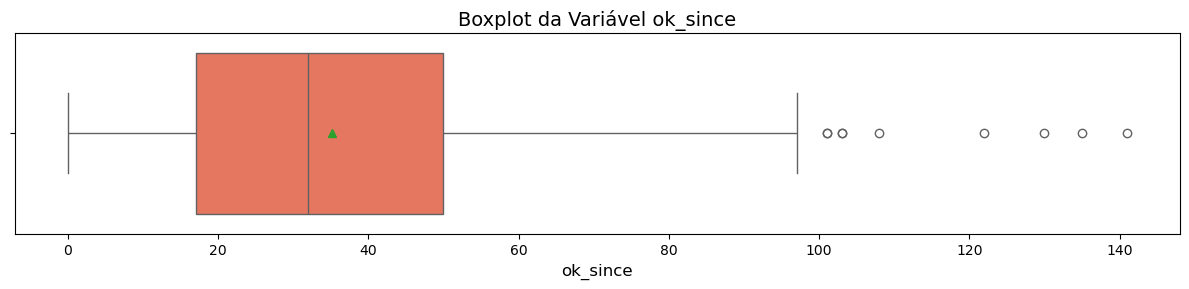

In [197]:
plot_boxplot(cred_risk_df_clean, 'ok_since')

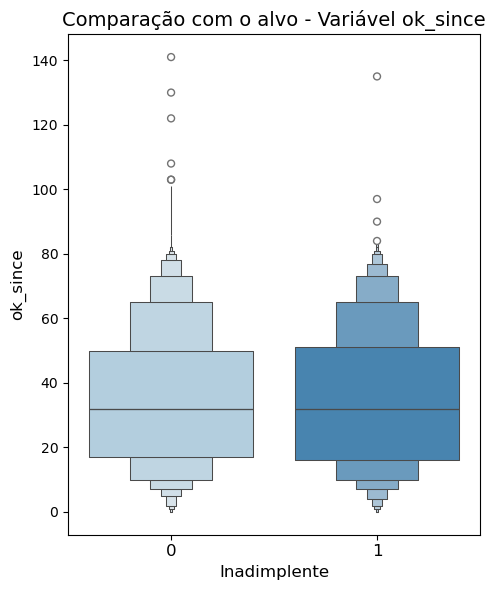

In [198]:
comparison_boxplot(cred_risk_df_clean, 'ok_since')

Interessante notar que as distribuições estatísticas são parecidas na variável `ok_since` para ambas as classes no alvo. Contudo, fica claro que existem mais clientes classificados como normais - note como a calda da classe 0 é maior, e como existem mais _outliers_ para valores altos. Contudo, essa análise deixa claro que existem outros fatores que influenciam na inadimplência, para além do tempo de fidelidade no pagamento do crédito.

#### last_amount_borrowed

A variável `last_amount_borrowed` traz informações dos valores que foram emprestados aos clientes na última vez.

In [199]:
col_info(cred_risk_df_clean, 'last_amount_borrowed')

Variável last_amount_borrowed

Proporção de valores ausentes: 66.09%

Sumário Estatístico last_amount_borrowed:

count    13752.0
mean     13339.4
std       7930.3
min       1005.2
25%       7210.2
50%      12011.4
75%      18030.7
max      35059.6
Name: last_amount_borrowed, dtype: float64

Valores únicos: 
[25033.92      nan  7207.92 ...  5022.86 14766.42  4226.74] 

Quantidade de valores únicos: 13123

Tipo da variável:  float64


Apesar da grande quantidade de valores ausentes, ainda temos muitos valores únicos. Não existem muitos valores discrepantes também, pois os valores da média e da mediana são próximos na estatística descritiva da variável. O maior problema, de fato, são as muitas entradas com valores ausentes. Não temos como saber o motivo específico dessa falta, mas temos duas alternativas: preencher com a mediana, ou zeros.

Iremos preencher com a mediana pois, para a porção de clientes normais que são bons pagadores, a mediana irá informar que eles, no mínimo, pagaram o que foi emprestado, enquanto que para o inadimplentes, a mediana irá dimensionar o peso que o valor do empréstimo tem na condição de inadimplência. 

Se preenchêssemos com zeros, os exemplos de inadimplentes não teriam nenhum valor emprestado, o que pode de alguma forma náo ser representativo da realidade (i.e, inadimplentes necessariamente precisam tomar um empréstimo antes de se tornarem inadimplentes).

Obviamente são suposições que temos que fazer devido à falta de visão de como o conjunto de dados foi estruturado e pela falta de conhecimentos mais aprofundados do negócio.

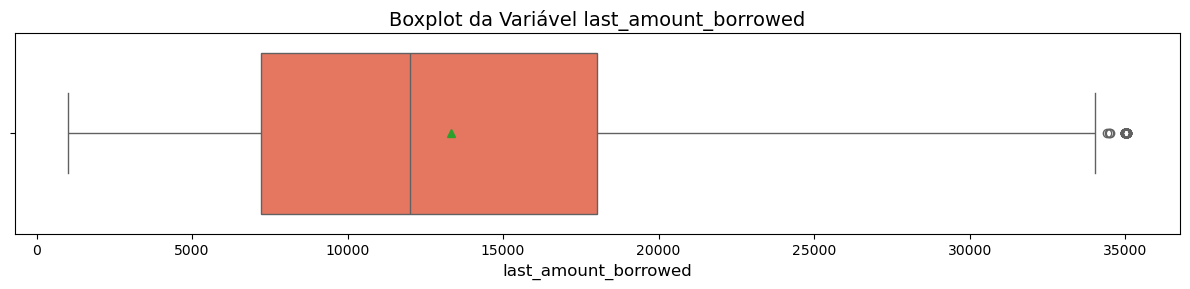

In [201]:
plot_boxplot(cred_risk_df_clean, 'last_amount_borrowed')

#### last_borrowed_in_months

Essa variável diz respeito a quantidade de meses desde o último empréstimo de um cliente.

In [202]:
col_info(cred_risk_df_clean, 'last_borrowed_in_months')

Variável last_borrowed_in_months

Proporção de valores ausentes: 66.09%

Sumário Estatístico last_borrowed_in_months:

count    13752.0
mean        40.6
std          9.4
min         36.0
25%         36.0
50%         36.0
75%         36.0
max         60.0
Name: last_borrowed_in_months, dtype: float64

Valores únicos: 
[36. nan 60.] 

Quantidade de valores únicos: 2

Tipo da variável:  float64


Note que a proporção de valores ausentes é o mesmo da variável que diz a quantidade do último empréstimo. Não sabemos se correspondem às mesmas entradas.

Vamos verificar se as entradas ausentes correspondem às mesmas para as duas variáveis, `last_amount_borrowed` e `last_borrowed_in_months`. Iremos utilizar o método _loc_ com duas condições: filtrar as entradas ausentes para as duas colunas.

In [203]:
print('Quantidade de entradas ausentes comuns entre as duas variáveis:')
print(round(cred_risk_df.loc[(cred_risk_df['last_amount_borrowed'].isna()) & (cred_risk_df['last_borrowed_in_months']).isna()].shape[0] * 100/ cred_risk_df.__len__(), 2), '%')

Quantidade de entradas ausentes comuns entre as duas variáveis:
66.57 %


Verificamos que todas as entradas ausentes de `last_borrowed_in_months` correspondem às da variável `last_amount_borrowed`. Iremos imputar o valor da mediana, para representar que o valor foi emprestado há um determinado tempo para esses exemplos, evitando assim que o algoritmo interprete que o valor acabou de ser emprestado.

#### credit_limit

Essa variável mostra o limite de crédito liberado para os clientes do banco.

In [204]:
col_info(cred_risk_df_clean, 'credit_limit')

Variável credit_limit

Proporção de valores ausentes: 31.39%

Sumário Estatístico credit_limit:

count     27823.0
mean      33906.4
std       36177.1
min           0.0
25%        9975.5
50%       25233.0
75%       46576.0
max      448269.0
Name: credit_limit, dtype: float64

Valores únicos: 
[    0. 39726.    nan ... 10431. 36262. 17942.] 

Quantidade de valores únicos: 18882

Tipo da variável:  float64


A média do limite de crédito é de R$ 33877, e a mediana é de R$ 25213. Essa discrepância nesses dois parâmetros se deve ao fato de haver muitos _outliers_ nessa variável, _i.e_, pessoas que possuem um limite de crédito muito alto.

Essa variável já possui uma proporção menor de valores ausentes, tornando possível imputar os valores a partir das informações do sumário estatístico, especificamente a mediana. Iremos fazer esse tratamento nas etapas posteriores. Outra coisa é o tipo da variável, que pode ser convertido para _int_.

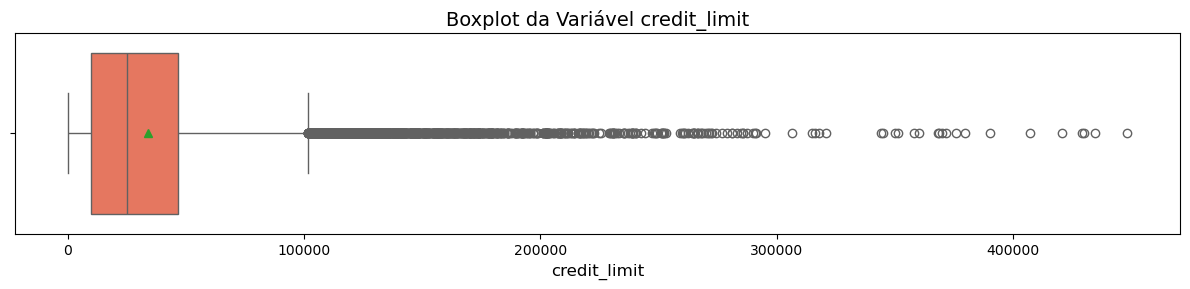

In [206]:
plot_boxplot(cred_risk_df_clean, 'credit_limit')

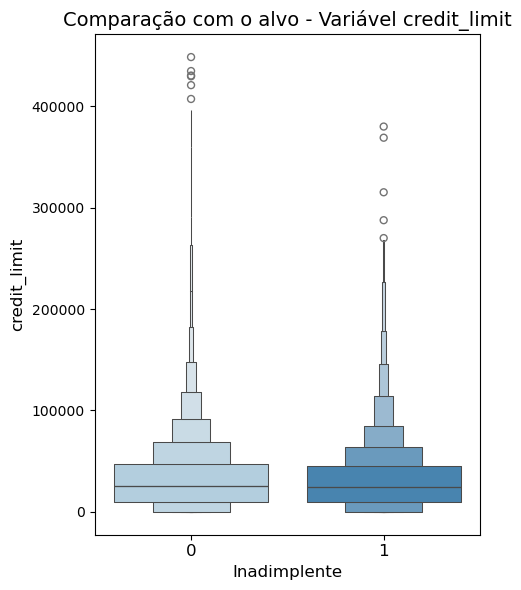

In [207]:
comparison_boxplot(cred_risk_df_clean, 'credit_limit')

Note porém, que os _outliers_ são bem informativos para essa variável. Vemos que os clientes classificados como normais possuem limites de crédito mais altos se comparados com os limites de crédito dos inadimplentes. Isso faz sentido, uma vez que o banco irá considerar o histórico de bom pagador para liberar crédito.

#### n_issues

Essa variável reporta a quantidade de problemas (reclamações dos clientes ou problemas da empresa com o cliente?). Não há mais detalhes sobre ela.

In [172]:
col_info(cred_risk_df_clean, 'n_issues')

Variável n_issues

Proporção de valores ausentes: 26.17%

Sumário Estatístico n_issues:

count    30818.0
mean        11.0
std          4.6
min          0.0
25%          8.0
50%         10.0
75%         14.0
max         49.0
Name: n_issues, dtype: float64

Valores únicos: 
[18. 14. nan 19.  9.  7.  8. 16. 20.  5. 13. 12. 23. 22. 11.  6. 15. 17.
 21.  4. 10.  3. 24. 25. 30.  2. 27. 37. 26. 29. 28. 40. 34. 49.  1. 31.
 32. 39. 42. 33. 36. 35.  0. 41. 38.] 

Quantidade de valores únicos: 44

Tipo da variável:  float64


Outra variável que iremos preencher os valores ausentes com a mediana, uma vez que a proporção de valores nulos é de 25,7%. Além disso, pode ser convertida para tipo _int_.

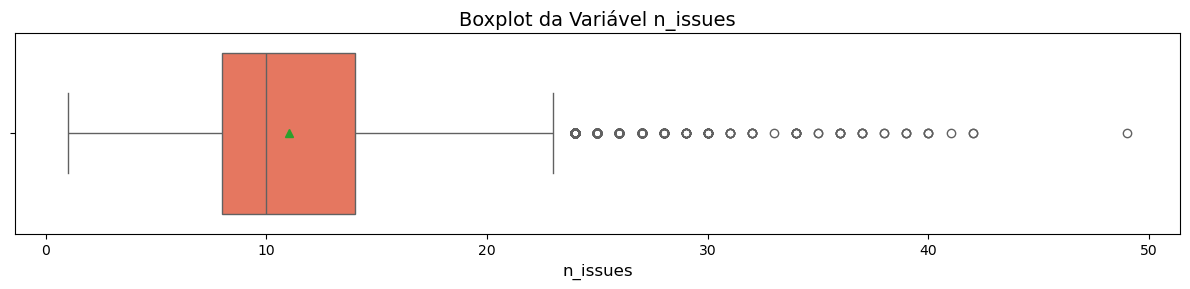

In [208]:
plot_boxplot(cred_risk_df_clean, 'n_issues')

#### external_data_provider_email_seen_before

In [174]:
col_info(cred_risk_df_clean, 'external_data_provider_email_seen_before')

Variável external_data_provider_email_seen_before

Proporção de valores ausentes: 5.0%

Sumário Estatístico external_data_provider_email_seen_before:

count    39656.0
mean        12.7
std        125.7
min       -999.0
25%         11.0
50%         27.0
75%         43.0
max         59.0
Name: external_data_provider_email_seen_before, dtype: float64

Valores únicos: 
[  51.   17.    9.   38.   46.   21.   16.   37.    6.   nan   10.   29.
   43.   59.   54.   13.   52.    4.   31.   40.   -1. -999.   26.   48.
   50.    5.    3.   39.   11.    0.   58.   55.    2.    1.   53.   15.
   23.   24.   44.   14.   25.   34.   35.   12.   27.   49.    7.   36.
   47.   57.   20.    8.   18.   30.   42.   28.   41.   56.   32.   33.
   19.   22.   45.] 

Quantidade de valores únicos: 62

Tipo da variável:  float64


Essa variável apresenta dois valores discrepantes de -999 e -1. Juntas, essas entradas somam poucos mais de 1100, de modo que representam uma pequena parcela do conjunto de dados e serão removidas.

In [185]:
idx_999 = cred_risk_df_clean.loc[cred_risk_df_clean['external_data_provider_email_seen_before'] == -999.].index
idx_1 = cred_risk_df_clean.loc[cred_risk_df_clean['external_data_provider_email_seen_before'] == -1.].index

cred_risk_df_clean = cred_risk_df_clean.copy()

# Removendo entradas com valores -999
cred_risk_df_clean.drop(index = idx_999, axis = 0, inplace = True)
# Removendo entradas com valores -1
cred_risk_df_clean.drop(index = idx_1, axis = 0, inplace = True)

n_999 = cred_risk_df_clean.loc[cred_risk_df_clean['external_data_provider_email_seen_before'] == -999.].shape[0]

print('Número de entradas discrepantes: ', n_999)

Número de entradas discrepantes:  0


Agora temos um sumário estatístico correto. Iremos preencher os valores ausentes que restaram pelo valor da mediana, uma vez que eles correspondem a 5% das entradas do conjunto nessa variável.

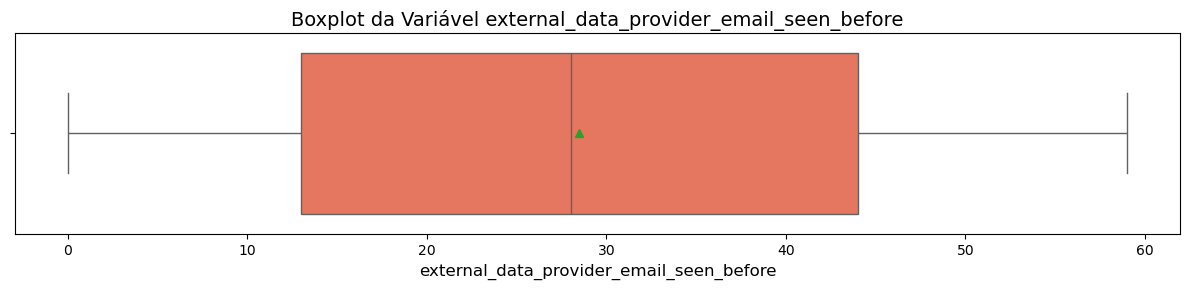

In [209]:
plot_boxplot(cred_risk_df_clean, 'external_data_provider_email_seen_before')

#### n_bankruptcies

In [210]:
col_info(cred_risk_df, 'n_bankruptcies')

Variável n_bankruptcies

Proporção de valores ausentes: 1.55%

Sumário Estatístico n_bankruptcies:

count    44303.0
mean         0.1
std          0.3
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          5.0
Name: n_bankruptcies, dtype: float64

Valores únicos: 
[ 0.  1. nan  2.  3.  4.  5.] 

Quantidade de valores únicos: 6

Tipo da variável:  float64


No caso dessa variável, iremos substituir os valores ausentes por zero. Além disso, ela pode ser convertida para o tipo _int_.

In [ ]:
bankruptcies_isna = cred_risk_df['n_bankruptcies'].isna().sum()

if bankruptcies_isna > 0:
    cred_risk_df['n_bankruptcies'].fillna(0, inplace = True)

In [ ]:
fig,ax = plt.subplots(figsize = (8, 4))

sns.countplot(cred_risk_df, x = 'n_bankruptcies', palette = 'Blues_r', ax = ax)

ax.set_title('Número de falências', fontsize = 14)
ax.set_ylabel('Contagem', fontsize = 12)
ax.set_xlabel('Nº de falências', fontsize = 12)

fig.tight_layout()

Como é de se esperar, a maioria dos clientes nunca reportou nenhuma falência. A proporção daqueles que reportaram uma falência é mais de 8 vezes menor do que a quantidade de clientes que nunca faliu, enquanto as proporções dos que reportaram duas ou mais falências é ínfima.

#### marketing_channel

Essa variável mostra quantos clientes vieram de cada canal de marketing.

In [ ]:
variable_info(cred_risk_df, 'marketing_channel')

In [ ]:
fig,ax = plt.subplots(figsize = (8, 4))

mkt_count = cred_risk_df['marketing_channel'].value_counts().sort_values(ascending = False)

sns.countplot(cred_risk_df, y = 'marketing_channel', palette = 'flare')

ax.set_title('Canal de marketing', fontsize = 14)
ax.set_ylabel('Canal', fontsize = 12)
ax.set_xlabel('Contagem', fontsize = 12)

fig.tight_layout()

Segundo as estatísticas, mais de 10 mil clientes vieram da Internet através do site. Em segundo lugar aparece a lista de espera, com mais de 6 mil clientes vindos de lá. Os outros canais todos contribuem de maneira igual.

#### n_defaulted_loans

Essa variável reporta quantos clientes já tiveram empréstimos inadimplentes no passado, informando a quantidade.

In [ ]:
variable_info(cred_risk_df, 'n_defaulted_loans')

In [ ]:
cred_risk_df['n_defaulted_loans'].value_counts()

Vemos que a esmagadora maioria nunca teve nenhum empréstimo inadimplente. O número de clientes com 1 ou mais inadimplências no histórico não passa de 0,01% do conjunto de dados.

Além disso, a variável possui poucas entradas com valores ausentes que podem ser substituídas por zero, dado que é o valor mais provável.

#### n_accounts

In [ ]:
variable_info(cred_risk_df, 'n_accounts')

In [ ]:
plot_boxplot('n_accounts')

#### risk_rate

In [ ]:
variable_info(cred_risk_df, 'risk_rate')

In [ ]:
plot_boxplot('risk_rate')

#### income

In [ ]:
variable_info(cred_risk_df, 'income')

In [ ]:
plot_boxplot('income')

Nota-se que a variável `income` apresenta valores muito discrepantes, que enviesam de tal maneira a distribuição dos dados que se torna impossível visualizar a estatística pelo Boxplot.

In [ ]:
comparison_boxplot('income')

O mesmo acontece ao compararmos as distribuições dos dados segundo as classes da variável-alvo. Iremos remover esses _outliers_, uma vez que eles podem enviesar o algoritmo, caso ele seja sensível a _outliers_, ajustando uma função que não será acurada em dados novos gerais. Além disso, até para algoritmos que lidam bem com _outliers_, a remoção permitirá que o algoritmo foque mais onde há maior volume de dados na distribuição, visualizando melhor estatísticas para abstrair padrões.

In [ ]:
outlier_removal('income')

In [ ]:
comparison_boxplot('income')

Da análise estatística, é possível notar que a classe de clientes normais possuem uma mediana de renda maior do que os inadimplentes. Possuem também, uma quantidade maior de clientes com renda maior, uma vez que a calda do boxplot é mais alongada para os cliente normais.

#### reported_income

In [ ]:
variable_info(cred_risk_df, 'reported_income')

In [ ]:
print('A variável possui {} entradas com valores tidos como infinito.'.format(cred_risk_df.loc[cred_risk_df['reported_income'] == np.inf].shape[0]))

In [ ]:
inf_idx = cred_risk_df.loc[cred_risk_df['reported_income'] == np.inf].index
n_inf_entries = cred_risk_df.loc[cred_risk_df['reported_income'] == np.inf].shape[0]

if n_inf_entries != 0:
    cred_risk_df.drop(inf_idx, axis = 0, inplace = True)
    print('Valores infinitos removidos!')

In [ ]:
plot_boxplot('reported_income')

In [ ]:
outlier_removal('reported_income') 

print('\nNova estatística: \n')
print(cred_risk_df['reported_income'].describe().round(2))

In [ ]:
plot_boxplot('reported_income')

#### application_time_in_funnel

In [ ]:
variable_info(cred_risk_df, 'application_time_in_funnel')

In [ ]:
plot_boxplot('application_time_in_funnel')

#### score_3

In [ ]:
variable_info(cred_risk_df, 'score_3')

In [ ]:
plot_boxplot('score_3')

In [ ]:
comparison_boxplot('score_3')

#### score_4

In [ ]:
variable_info(cred_risk_df, 'score_4')

In [ ]:
plot_boxplot('score_4')

In [ ]:
comparison_boxplot('score_4')

#### score_5

In [ ]:
variable_info(cred_risk_df, 'score_5')

In [ ]:
plot_boxplot('score_5')

In [ ]:
comparison_boxplot('score_5')

#### score_6

In [ ]:
variable_info(cred_risk_df, 'score_6')

In [ ]:
plot_boxplot('score_6')

In [ ]:
comparison_boxplot('score_6')

### Imputar valores ausentes

#### Critérios para remoção de variáveis:

* Baixo poder preditivo (e.g `facebook_profile`, `profile_phone_number`);
* Baixa interpretabilidade devido a codificação (`state`, `job_name`);
* Dificíl formatação dos dados que dificulta a interpretação (e.g `user_agent`, `profile_tags`);
* Possuir apenas um valor único (e.g `channel`).


In [ ]:
cred_risk_df_clean = cred_risk_df.copy()

cols_to_drop = ['target_fraud', 'external_data_provider_fraud_score',
                'ids', 'email', 'external_data_provider_first_name',
                'profile_phone_number', 'profile_tags', 'facebook_profile',
                'user_agent', 'state', 'zip', 'job_name', 'channel',
                'shipping_zip_code', 
                'external_data_provider_credit_checks_last_month',
                'application_time_applied', 'reason', 'real_state', 
                'external_data_provider_credit_checks_last_year',
                'external_data_provider_credit_checks_last_2_year']

for col in cols_to_drop:
    if col in cred_risk_df_clean.columns.tolist():
        
        cred_risk_df_clean.drop(col, axis = 1, inplace = True)

print('Nova Dimensão do Conjunto')
print(f'\nEntradas: {cred_risk_df_clean.shape[0]}',
      f'\nVariáveis: {cred_risk_df_clean.shape[1]}')

Variáveis que iremos imputar o valor da mediana:

* `credit_limit`
* `external_data_provider_email_seen_before`
* `last_amount_borrowed`
* `ok_since`

Variáveis que iremos imputar o valor zero:

* `last_borrowed_in_months`
* `n_issues`
* `n_bankruptcies`

In [ ]:
# Instanciando os imputers numérico e categórico
num_imputer = SimpleImputer(missing_values = np.nan, strategy = 'median')
cat_imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

# Colunas cujas entradas nulas serão preenchidas por zero 
cols_to_fill_0 = ['last_borrowed_in_months', 'n_issues', 'n_bankruptcies']
isna = cred_risk_df[cols_to_fill_0].isna().sum()[0]

# Substituir valores nulos por zero
if isna > 0:
   cred_risk_df.loc[:, cols_to_fill_0] = cred_risk_df.loc[:, cols_to_fill_0].replace({np.nan: 0})

# Filtro de variáveis numéricas e categóricas
num_cols = cred_risk_df.select_dtypes(include = 'float64').columns
cat_cols = cred_risk_df.select_dtypes(include = 'object').columns

median_cols = [col for col in num_cols if col not in cols_to_fill_0]
isna_2 = cred_risk_df[median_cols].isna().sum()[-2]

# Substituir valores nulos pela mediana
if isna_2 > 0:
    num_imputer = num_imputer.fit(cred_risk_df.loc[:, median_cols])
    cred_risk_df.loc[:, median_cols] = num_imputer.transform(cred_risk_df.loc[:, median_cols])

isna_3 = cred_risk_df['marketing_channel'].isna().sum()

# Substituir valores nulos pela moda
if isna_3 > 0:
    cat_imputer = cat_imputer.fit(np.array(cred_risk_df.loc[:, 'marketing_channel']).reshape(-1, 1))
    cred_risk_df.loc[:, 'marketing_channel'] = cat_imputer.transform(np.array(cred_risk_df.loc[:, 'marketing_channel']).reshape(-1, 1))

### Feature Engineering de longitude e latitude

In [ ]:
cred_risk_df_clean.loc[~cred_risk_df_clean['lat_lon'].isna(), 'latitude'] = cred_risk_df_clean.loc[~cred_risk_df_clean['lat_lon'].isna(), 'lat_lon'].apply(lambda j: str(j).split(',')[0].strip('()'))
cred_risk_df_clean.loc[~cred_risk_df_clean['lat_lon'].isna(), 'longitude'] = cred_risk_df_clean.loc[~cred_risk_df_clean['lat_lon'].isna(), 'lat_lon'].apply(lambda j: str(j).split(',')[1].strip('()'))

cred_risk_df_clean['latitude'] = cred_risk_df_clean['latitude'].astype('float64')
cred_risk_df_clean['longitude'] = cred_risk_df_clean['longitude'].astype('float64')

if 'lat_lon' in cred_risk_df_clean.columns.tolist():
    cred_risk_df_clean.drop(columns = ['lat_lon'], axis = 1, inplace = True)

In [ ]:
cred_risk_df_clean['latitude'].describe(), cred_risk_df_clean['longitude'].describe()

In [ ]:
fig, ax = plt.subplots(figsize = (6, 6))

sns.scatterplot(cred_risk_df_clean, 
                x = 'longitude', 
                y = 'latitude',
                hue = 'target_default',
                palette = 'BuPu',
                alpha = .25)

ax.set_title('Distribuição geográfica dos clientes por classe de inadimplência', fontsize = 14)
ax.set_xlabel('Latitude', fontsize = 12)
ax.set_ylabel('Longitude', fontsize = 12)

ax.legend()

fig.tight_layout()

### Tipos das variáveis no conjunto de dados limpo

In [ ]:
int_cols = ['ok_since', 'last_borrowed_in_months',
            'credit_limit', 'n_issues',
            'external_data_provider_email_seen_before',
            'n_bankruptcies', 'n_defaulted_loans',
            'n_accounts', 'reported_income',
            'application_time_in_funnel', 'score_3']

for col in int_cols:
    cred_risk_df_clean.loc[:, col] = cred_risk_df_clean.loc[:, col].astype('int64')

cred_risk_df_clean.dtypes

In [ ]:
cred_risk_df_clean